<img src="../images/bubbles-banner.jpg" alt="Exam bubbles">

# <span style='color:#f67088'>GA Data Science Immersive : Project 1</span>
<span style='color:#f67088'><a href="http://gwyneth.butera.org">Gwyneth Butera</a></span>

<span style='color:#ce8f31'>**Prjoject description:**<br>
For our first project, we're going to take a look at SAT and ACT scores around the United States. Suppose that the College Board - the organization that administers the SAT - seeks to improve the participation rate of its exams. Your presentation should be geared toward **non-technical** executives with the College Board and you will use, at minimum, the provided data to make recommendations about how the College Board might work to increase the participation rates of these exams.</span>


### <span style='color:#32b165'>Table of contents</span>
* <a href="#step1"><span style='color:#35aca4'>Load the data and perform basic operations.</span></a>
* <a href="#step2"><span style='color:#35aca4'>Manipulate the dataframe.</span></a>
* <a href="#step3"><span style='color:#35aca4'>Visualize the data</span></a>
* <a href="#step4"><span style='color:#35aca4'>Descriptive and Inferential Statistics</span></a>
* <a href="https://docs.google.com/presentation/d/1ZyA10Eq0omf7Enb6GVngixXLvuS2LEBCHtAnXqjJDNw/edit?usp=sharing"><span style='color:#35aca4'>(WIP) Slide presentation</span></a>

 <hr>
 <a name="step1"></a>
 ## <span style='color:#32b165'>I. Load the data and perform basic operations.</span>

In [1]:
# Let's get all our helper libraries loaded first

import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid", {'axes.grid' : False})

# %config InlineBackend.figure_format = 'retina'
%matplotlib inline

##### <span style='color:#35aca4'>A. Load the data in using pandas.</span>

<span style='color:#38a7d0'>We load the SAT and ACT data into two dataframes. We also load in state-by-state enrollment data scraped from "governing.com":<a href="http://www.governing.com/topics/education/gov-fragmented-school-districts-consolidation.html">governing.com</a>.</span>

In [2]:
# Read the data into DataFrames
sat = pd.read_csv("../data/sat.csv")
act = pd.read_csv("../data/act.csv")

# Enrollment data was scraped from 
# http://www.governing.com/topics/education/gov-fragmented-school-districts-consolidation.html
enroll = pd.read_csv("../data/enrollment.csv")

##### <span style='color:#35aca4'>B. Print the first few rows of each dataframe.</span>

In [3]:
sat.head(3)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116


In [4]:
act.head(3)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8


##### <span style='color:#35aca4'>C. Describe in words what each variable (column) is.</span>

<span style='color:#38a7d0'>**For the SAT:**</span>

* <span style='color:#38a7d0'>**Unamed: 0** : An index column</span>
* <span style='color:#38a7d0'>**State**: The state being considered</span>
* <span style='color:#38a7d0'>**Participation**: Percentage of students that took the exam</span></span>
* <span style='color:#38a7d0'>**Evidence-Based Reading and Writing**: Average score for EBRW section (200-800)</span>
* <span style='color:#38a7d0'>**Math**: Average score for math section (200-800)</span>
* <span style='color:#38a7d0'>**Total**: Average combined EBRW and math score</span>

<span style='color:#38a7d0'>**For the ACT:**

* <span style='color:#38a7d0'>**Unamed**: An index column</span>
* <span style='color:#38a7d0'>**State**: The state being considered</span>
* <span style='color:#38a7d0'>**Participation**: Percentage of students that participated</span>
* <span style='color:#38a7d0'>**English**: Average score (1-36)</span>
* <span style='color:#38a7d0'>**Math**: Average score (1-36)</span>
* <span style='color:#38a7d0'>**Reading**: Average score (1-36)</span>
* <span style='color:#38a7d0'>**Science**: Average score (1-36)</span>
* <span style='color:#38a7d0'>**Composite**: Average of composite score, where composite score is the average of the four area scores, rounded up to the nearest whole number (1-36)</span></span>


##### <span style='color:#35aca4'>D. Does the data look complete? Are there any obvious issues with the observations?</span>

In [5]:
# act.info
print("There are {} NaNs in the dataframe.".format(act.isnull().sum().sum()))
act.describe()

There are 0 NaNs in the dataframe.


,Unnamed: 0,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,25.500000,20.919231,21.173077,22.001923,21.040385,21.509615
std,15.154757,2.332132,1.963602,2.048672,3.151113,2.002083
min,0.000000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,12.750000,19.000000,19.400000,20.475000,19.900000,19.800000
50%,25.500000,20.550000,20.900000,21.700000,21.150000,21.400000
75%,38.250000,23.300000,23.100000,24.125000,22.525000,23.600000
max,51.000000,25.500000,25.300000,26.000000,24.900000,25.500000


In [6]:
sat.describe()
print("There are {} NaNs in the dataframe.".format(act.isnull().sum().sum()))

There are 0 NaNs in the dataframe.


<span style='color:#38a7d0'>The data looks complete as there are no missing (null) entries.</span> 

<span style='color:#38a7d0'>**However:**</span>
   * <span style='color:#38a7d0'>the minimum of science on the ACT science is very low at 2.3.</span>
   * <span style='color:#38a7d0'>the minimum of math for the SAT is too low at 52. (The lowest possible is 200.)</span>

<span style='color:#38a7d0'>We will investigate these 'abnormal' values a little further along in the notebook.</span>

##### <span style='color:#35aca4'>E. Are there any issues in the consistency of the data?</span>

In [7]:
# Check consistency of data

# sat_sections = ["Math", "Evidence-Based Reading and Writing"]
# act_sections = ["Math", "English", "Reading", "Science"]

# SAT sections should add up to SAT total
check_sat = abs(sat.Math + sat["Evidence-Based Reading and Writing"] - sat.Total)
for ix,val in check_sat.iteritems():
    if val > 1:
        print("State {} ({}): math+ebrw-Total = {}".format(ix, sat.loc[ix,'State'], val)) 

# ACT sections should add up to add up to 4 times the ACT Composite
check_act = abs(act.Math + act.English + act.Reading + act.Science - act.Composite*4)
for ix,val in check_act.iteritems():
    if val > 1:
        print("State {} ({}): math + english + reading + science -4*Composite = {}"
              .format(ix, act.loc[ix,'State'], val)) 
        

State 20 (Maryland): math+ebrw-Total = 472
State 21 (Maryland): math + english + reading + science -4*Composite = 21.5


<span style='color:#38a7d0'>The scores for Maryland are inconsistent. We can change the incorrect scores to ensure the data is consistent..</span> 

In [8]:
# Clean data by hand
sat.loc[20, "Math"] = sat.Total[20] - sat.loc[20, "Evidence-Based Reading and Writing"]
act.loc[21, "Science"] = act.Composite[21]*4 - act.Reading[21] - act.English[21] - act.Math[21]

##### <span style='color:#35aca4'>F. Print the types of each column.</span>

In [9]:
# ACT column types
print("ACT column types:")
act.dtypes

ACT column types:


Unnamed: 0         int64
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [10]:
# SAT column types
print("SAT column types:")
sat.dtypes

SAT column types:


Unnamed: 0                             int64
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

##### <span style='color:#35aca4'>F. Do any types need to be reassigned? If so, go ahead and do it.</span>
<span style='color:#38a7d0'>**We can do some cleaning:**</span> 
* <span style='color:#38a7d0'>Drop the <span style="font-family:monospace">Unnamed: 0</span> columns from SAT and ACT.</span>
* <span style='color:#38a7d0'>Keep only the <span style="font-family:monospace">State</span> and <span style="font-family:monospace">Enroll</span> columns in the enrollment dataframe.</span>
* <span style='color:#38a7d0'>Remove the <span style="font-family:monospace">National</span> row from the ACT dataframe.</span>
* <span style='color:#38a7d0'>Set <span style="font-family:monospace">State</span> as the index in both testing dataframes.</span>
* <span style='color:#38a7d0'>Change the participation rate to a floating point value in both testing dataframes.</span>
* <span style='color:#38a7d0'>Adjust the enrollment to be 1/13 of the total K-12 enrollment of each state.</span>

<span style='color:#38a7d0'>**Ideas for improvement:**</span>
* <span style='color:#38a7d0'>Change Participation from out of 100 to be out of 1.0 (divide by 100).</span>

In [11]:
# Remove the unamed columns from both and the national from act
sat.drop('Unnamed: 0', axis=1, inplace=True)
act.drop('Unnamed: 0', axis=1, inplace=True)

# Only keep columns we need
enroll = enroll[['State','Enroll']]

# Change the row index to be state
sat.set_index("State", inplace=True)
act.set_index("State", inplace=True)
enroll.set_index("State", inplace=True)

# Save the national row just in case
act_national = act.loc["National",:]
act.drop('National', axis=0, inplace=True)


# Change participation of SAT, ACT to be a float
sat['Participation'] = sat['Participation'].map(lambda cell: cell.replace('%',''))
act['Participation'] = act['Participation'].map(lambda cell: cell.replace('%',''))

sat['Participation'] = sat['Participation'].astype(float)
act['Participation'] = act['Participation'].astype(float)

enroll['Enroll'] = enroll['Enroll'].map(lambda cell: cell.replace(',',''))
enroll['Enroll'] = enroll['Enroll'].astype(float)

# Approximation of number of seniors
enroll['Enroll'] = enroll['Enroll']/13

##### <span style='color:#35aca4'>G. Merge the dataframes on the state column.</span>

In [12]:
# Merge the data on the state column
df = pd.merge(sat, act, on='State')
df = pd.merge(df,enroll, on='State')

##### <span style='color:#35aca4'>H. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.</span>

In [13]:
# Rename the columns 
df = df.rename(columns={
    'Participation_x': 'Participation_SAT', 
    'Evidence-Based Reading and Writing' : "EBRW_SAT",
    'Math_x' : 'Math_SAT',
    'Total' : 'Total_SAT',
    'Math_y' : 'Math_ACT',
    'English' : 'English_ACT',
    'Reading' : 'Reading_ACT',
    'Science' : 'Science_ACT',
    'Composite' : 'Composite_ACT',
    'Participation_y': 'Participation_ACT'
})

##### <span style='color:#35aca4'>I. Approximate the the number of students taking each test in each state.</span>

In [14]:
# Approximate number students taking test
df['Participation_SAT_count'] = df.Enroll * df.Participation_SAT /100
df['Participation_ACT_count'] = df.Enroll * df.Participation_ACT /100

##### <span style='color:#35aca4'>J. Print the minimum and maximum of each numeric column in the data frame.</span>

In [15]:
for c in df.columns:
    print("The min and max of column {} is {} and {}.".format(c,df[c].min(), df[c].max())) 

The min and max of column Participation_SAT is 2.0 and 100.0.
The min and max of column EBRW_SAT is 482 and 644.
The min and max of column Math_SAT is 468 and 651.
The min and max of column Total_SAT is 950 and 1295.
The min and max of column Participation_ACT is 8.0 and 100.0.
The min and max of column English_ACT is 16.3 and 25.5.
The min and max of column Math_ACT is 18.0 and 25.3.
The min and max of column Reading_ACT is 18.1 and 25.9.
The min and max of column Science_ACT is 18.2 and 24.7.
The min and max of column Composite_ACT is 17.8 and 25.4.
The min and max of column Enroll is 3457.076923076923 and 461219.53846153844.
The min and max of column Participation_SAT_count is 156.2969230769231 and 244446.35538461537.
The min and max of column Participation_ACT_count is 1079.4092307692308 and 170653.36153846156.


##### <span style='color:#35aca4'>K. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called <span style="font-family:monospace">sd</span>.</span>

<span style='color:#35aca4'>$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$</span>

 ##### <span style='color:#35aca4'>Turn the list <span style="font-family:monospace">sd</span> into a new observation in your dataset.</span>

In [16]:
# Function to calculate standard deviation
def my_std(values):
    mu = np.mean(values)
    return np.sqrt(sum([(v-mu)**2 for v in values])/len(values))

sd = df.apply(lambda x: my_std(x))

<hr>
 <a name="step2"></a>
## <span style='color:#32b165'>II. Manipulate the dataframe</span>

##### <span style='color:#35aca4'>A. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)</span>

In [17]:
# Sort DataFrame 
df = df.sort_values(by="Participation_SAT", ascending=False)
df.head()

,Participation_SAT,EBRW_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Enroll,Participation_SAT_count,Participation_ACT_count
State,,,,,,,,,,,,,
Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,24.1,103645.384615,103645.384615,30057.161538
Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2,39602.307692,39602.307692,12276.715385
Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.1,9267.307692,9267.307692,1668.115385
District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2,3457.076923,3457.076923,1106.264615
Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,24.3,13492.615385,12817.984615,1079.409231


In [18]:
# Sort DataFrame 
df = df.sort_values(by="Participation_ACT", ascending=False)
# df.head(18)
df.head()

,Participation_SAT,EBRW_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Enroll,Participation_SAT_count,Participation_ACT_count
State,,,,,,,,,,,,,
Mississippi,2.0,634,607,1242,100.0,18.2,18.1,18.8,18.8,18.6,31545.307692,630.906154,31545.307692
Montana,10.0,605,591,1196,100.0,19.0,20.2,21.0,20.5,20.3,11079.538462,1107.953846,11079.538462
North Carolina,49.0,546,535,1081,100.0,17.8,19.3,19.6,19.3,19.1,110758.153846,54271.495385,110758.153846
South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,18.7,55920.384615,27960.192308,55920.384615
Oklahoma,7.0,530,517,1047,100.0,18.5,18.8,20.1,19.6,19.4,51326.615385,3592.863077,51326.615385


In [19]:
# Sort DataFrame 
columns = ["Enroll", "Participation_SAT", "Participation_ACT", "Participation_SAT_count", "Participation_ACT_count"]
df_enroll = pd.DataFrame(df, columns=columns)
df_enroll = df_enroll.sort_values(by="Enroll", ascending=False)
df_enroll.head(15)


,Enroll,Participation_SAT,Participation_ACT,Participation_SAT_count,Participation_ACT_count
State,,,,,
California,461219.538462,53.0,31.0,244446.355385,142978.056923
Texas,379229.692308,62.0,45.0,235122.409231,170653.361538
Florida,206288.538462,83.0,73.0,171219.486923,150590.633077
Illinois,155797.769231,9.0,93.0,14021.799231,144891.925385
Georgia,130706.538462,61.0,55.0,79730.988462,71888.596154
New York,125042.615385,67.0,31.0,83778.552308,38763.210769
Ohio,123184.076923,12.0,75.0,14782.089231,92388.057692
Pennsylvania,122816.000000,65.0,23.0,79830.400000,28247.680000
North Carolina,110758.153846,49.0,100.0,54271.495385,110758.153846


In [20]:
print("Approximate participation counts:") 
print("ACT: {}".format(int(df.Participation_ACT_count.sum())))
print("SAT: {}".format(int(df.Participation_SAT_count.sum())))

Approximate participation counts:
ACT: 2114471
SAT: 1628130


### <span style='color:#38a7d0'>Observations:</span>
* <span style='color:#38a7d0'>Four states have 100% Participation in the SAT.</a>
* <span style='color:#38a7d0'>Seventeen states have 100% Participation in the ACT.</a>
* <span style='color:#38a7d0'>There are large states where neither has 100% participation.</a>

##### <span style='color:#35aca4'>B. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)</span>

In [21]:
df[df["Participation_SAT"] > 70]

,Participation_SAT,EBRW_SAT,Math_SAT,Total_SAT,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Enroll,Participation_SAT_count,Participation_ACT_count
State,,,,,,,,,,,,,
Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,19.8,206288.538462,171219.486923,150590.633077
Idaho,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,22.3,21314.153846,19822.163077,8099.378462
District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2,3457.076923,3457.076923,1106.264615
Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2,39602.307692,39602.307692,12276.715385
Massachusetts,76.0,555,551,1107,29.0,25.4,25.3,25.9,24.7,25.4,60351.461538,45867.110769,17501.923846
Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,24.1,103645.384615,103645.384615,30057.161538
Rhode Island,71.0,539,524,1062,21.0,24.0,23.3,24.7,23.4,24.0,9394.615385,6670.176923,1972.869231
Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.1,9267.307692,9267.307692,1668.115385
Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,24.3,13492.615385,12817.984615,1079.409231


<hr>
 <a name="step3"></a>
## <span style='color:#32b165'>III. Visualize the data</span>

##### <span style='color:#35aca4'>A. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) </span>

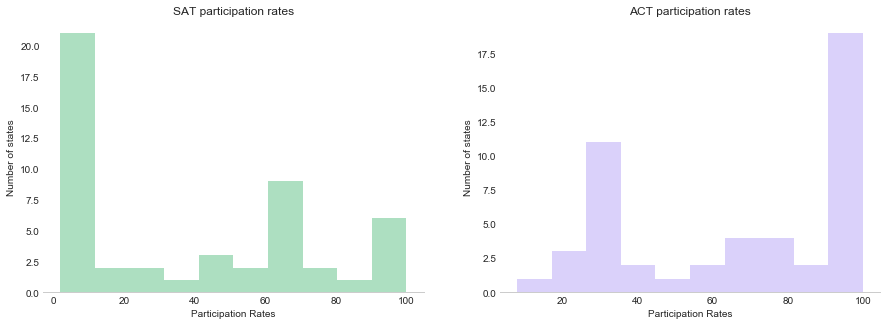

In [22]:
sat_color = "#32b165"
act_color = "#a38cf4"
reg_color = '#f67088'
reg2_color = '#96a331'

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 5))
sns.despine(left=True)
plt.subplots_adjust(hspace = .5)

ax=axes[0]
ax.set_title('SAT participation rates')
sns.distplot(df.Participation_SAT, bins=10, color=sat_color,kde=False, ax=ax)
#, hist_kws={"color": current_palette})
ax.set_xlabel('Participation Rates')    
ax.set_ylabel('Number of states');

ax=axes[1]
ax.set_title('ACT participation rates')
sns.distplot(df.Participation_ACT, bins=10, color=act_color, kde=False, ax=ax)
#, hist_kws={"color": current_palette})
ax.set_xlabel('Participation Rates')    
ax.set_ylabel('Number of states');


##### <span style='color:#35aca4'>B. Plot the Math(s) distributions from both data sets.</span>

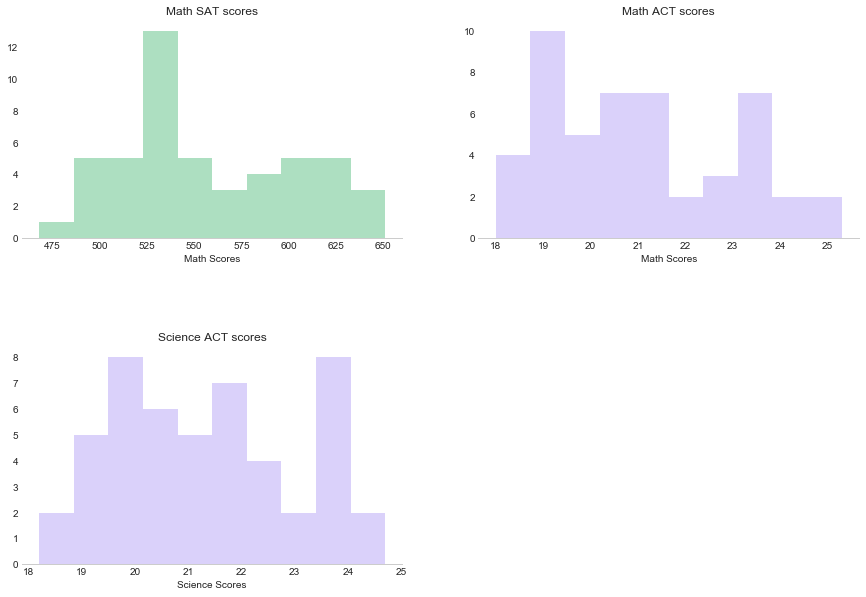

In [23]:
# Set up the matplotlib figure
f, axes = plt.subplots(2,2 , figsize=(15, 10))
sns.despine(left=True)
plt.subplots_adjust(hspace = .5)

ax=axes[0,0]
ax.set_title('Math SAT scores')
sns.distplot(df.Math_SAT, bins=10, color=sat_color,kde=False, ax=ax)
ax.set_xlabel('Math Scores');

ax=axes[0,1]
ax.set_title('Math ACT scores')
sns.distplot(df.Math_ACT, bins=10, color=act_color,kde=False, ax=ax)
ax.set_xlabel('Math Scores');

ax=axes[1,0]
ax.set_title('Science ACT scores')
sns.distplot(df.Science_ACT, bins=10, color=act_color,kde=False, ax=ax)
ax.set_xlabel('Science Scores');

ax=axes[1,1]
ax.set_visible(False)

##### <span style='color:#35aca4'>C. Plot the Verbal distributions from both data sets.</span>

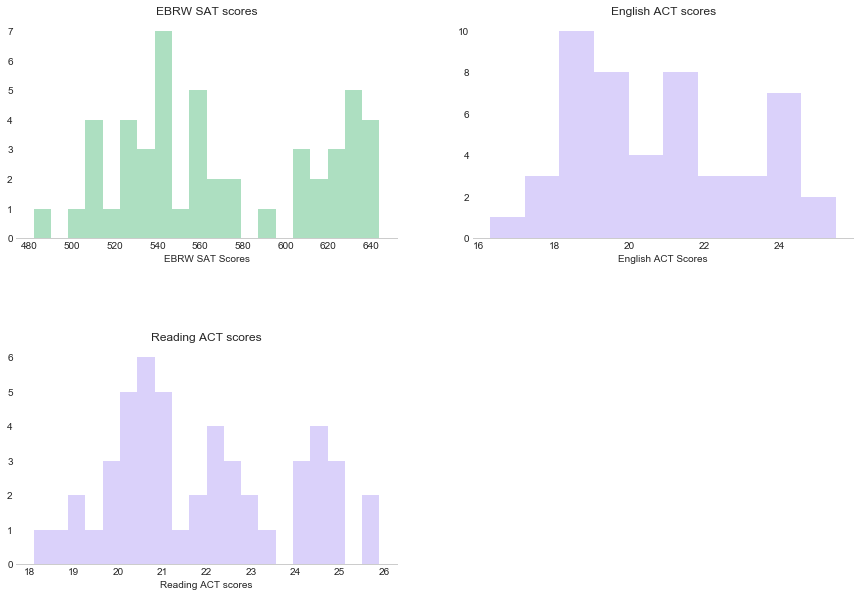

In [24]:
# Set up the matplotlib figure
f, axes = plt.subplots(2,2, figsize=(15, 10))
sns.despine(left=True)
plt.subplots_adjust(hspace = .5)

ax=axes[0,0]
ax.set_title('EBRW SAT scores');
sns.distplot(df.EBRW_SAT, bins=20, color=sat_color, kde=False, ax=ax);
ax.set_xlabel('EBRW SAT Scores');

ax=axes[0,1]
ax.set_title('English ACT scores')
sns.distplot(df.English_ACT, bins=10, color=act_color,kde=False, ax=ax)
ax.set_xlabel('English ACT Scores');

ax=axes[1,0]
ax.set_title('Reading ACT scores');
sns.distplot(df.Reading_ACT, bins=20, color=act_color, kde=False, ax=ax);
ax.set_xlabel('Reading ACT scores');

ax=axes[1,1]
ax.set_visible(False)

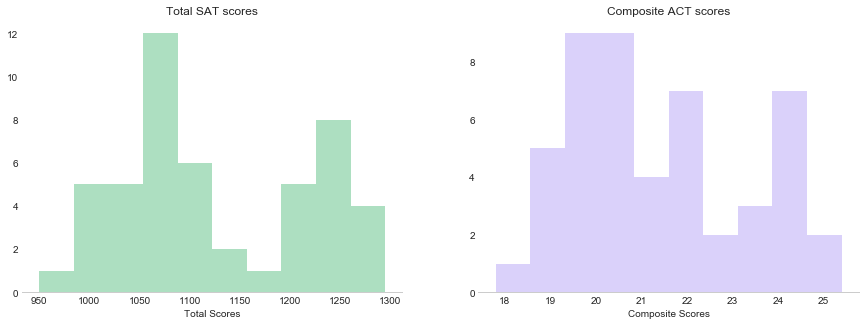

In [25]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 5))
sns.despine(left=True)
plt.subplots_adjust(hspace = .5)

ax=axes[0]
ax.set_title('Total SAT scores')
sns.distplot(df.Total_SAT, bins=10, color=sat_color, kde=False, ax=ax);
ax.set_xlabel('Total Scores');

ax=axes[1]
ax.set_title('Composite ACT scores');
sns.distplot(df.Composite_ACT, bins=10, color=act_color, kde=False, ax=ax);
ax.set_xlabel('Composite Scores');

##### <span style='color:#35aca4'>D. When we make assumptions about how data are distributed, what is the most common assumption? Does this assumption hold true for any of our columns? Which?</span>

<span style='color:#38a7d0'>The most common assumption is that the data is normally distributed. This somesn't seem to hold true for any of our columns.</span>

##### <span style='color:#35aca4'>E. Plot some scatterplots examining relationships between all variables.</span>

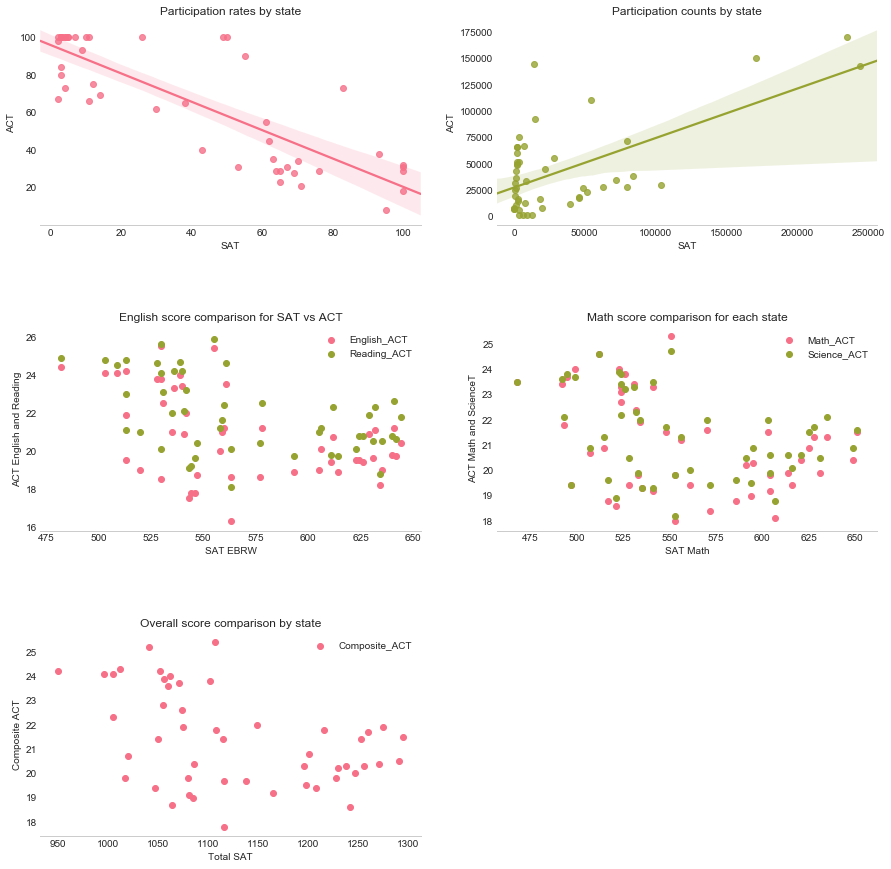

In [26]:
# Set up the matplotlib figure
f, axes = plt.subplots(3,2, figsize=(15, 15))
sns.despine(left=True)
plt.subplots_adjust(hspace = .5)

ax=axes[0,0]
ax.set_title("Participation rates by state");
sns.regplot(x="Participation_SAT", y="Participation_ACT", data=df, color=reg_color, ax=ax)
ax.set_xlabel("SAT")
ax.set_ylabel("ACT")

ax=axes[0,1]
ax.set_title("Participation counts by state");
sns.regplot(x="Participation_SAT_count", y="Participation_ACT_count", data=df, color=reg2_color, ax=ax);
ax.set_xlabel("SAT")
ax.set_ylabel("ACT")

ax=axes[1,0]
ax.set_title("English score comparison for SAT vs ACT");
ax.scatter(df.EBRW_SAT, df.English_ACT, color=reg_color)
ax.scatter(df.EBRW_SAT, df.Reading_ACT, color=reg2_color)
ax.set_xlabel("SAT EBRW")
ax.set_ylabel("ACT English and Reading")
ax.legend()

ax=axes[1,1]
ax.set_title("Math score comparison for each state");
ax.scatter(df.Math_SAT, df.Math_ACT, color=reg_color)
ax.scatter(df.Math_SAT, df.Science_ACT, color=reg2_color)
ax.set_xlabel("SAT Math")
ax.set_ylabel("ACT Math and ScienceT");
ax.legend()

ax=axes[2,0]
ax.set_title("Overall score comparison by state");
ax.scatter(df.Total_SAT, df.Composite_ACT, color=reg_color)
ax.set_xlabel("Total SAT")
ax.set_ylabel("Composite ACT")
ax.legend()

ax=axes[2,1]
ax.set_visible(False)


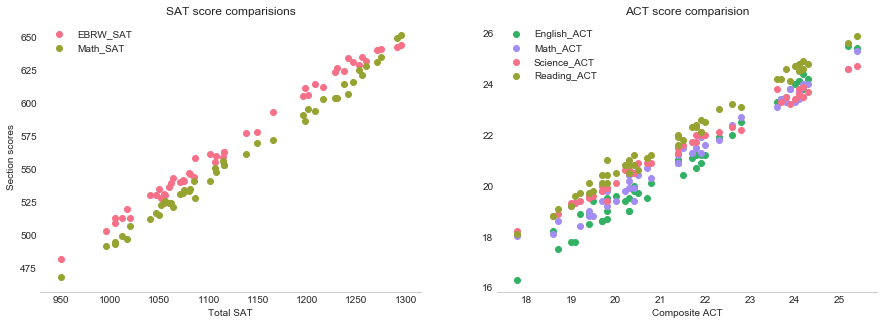

In [27]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 5))
sns.despine(left=True)
plt.subplots_adjust(hspace = .5)

ax=axes[0]
ax.set_title('SAT score comparisions')
ax.scatter(df.Total_SAT, df.EBRW_SAT, color=reg_color);
ax.scatter(df.Total_SAT, df.Math_SAT, color=reg2_color)
ax.set_xlabel('Total SAT');
ax.set_ylabel("Section scores")
ax.legend()

ax=axes[1]
ax.set_title('ACT score comparision');
ax.scatter(df.Composite_ACT, df.English_ACT, color=sat_color);
ax.scatter(df.Composite_ACT, df.Math_ACT, color=act_color)
ax.scatter(df.Composite_ACT, df.Science_ACT, color=reg_color)
ax.scatter(df.Composite_ACT, df.Reading_ACT, color=reg2_color)
ax.set_xlabel('Composite ACT');
ax.legend();


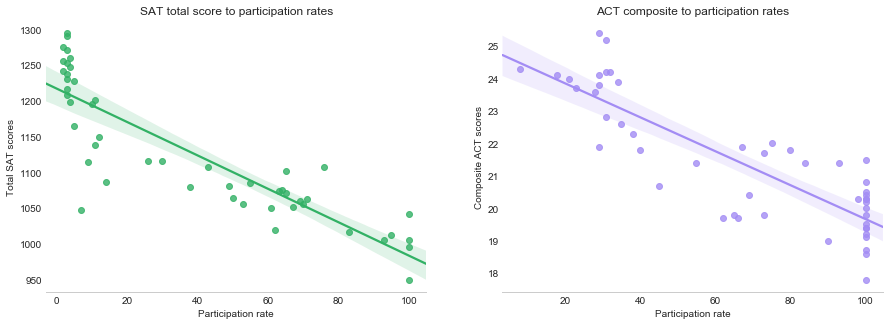

In [28]:

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 5))
sns.despine(left=True)
plt.subplots_adjust(hspace = .5)

ax=axes[0]
ax.set_title('SAT total score to participation rates');
sns.regplot(x="Participation_SAT", y="Total_SAT", data=df, color=sat_color, scatter=True, ax=ax)
ax.set_xlabel('Participation rate')
ax.set_ylabel("Total SAT scores")

ax=axes[1]
ax.set_title("ACT composite to participation rates")
sns.regplot(x="Participation_ACT", y="Composite_ACT", data=df, color=act_color, scatter=True, ax=ax)
ax.set_xlabel("Participation rate")
ax.set_ylabel("Composite ACT scores");


In [29]:
# While fun, this doens't add much to our observations
# sns.pairplot(df);

##### <span style='color:#35aca4'>F. Are there any interesting relationships to note?</span>

* <span style='color:#38a7d0'>The states with higher participation rates have lower average scores.</span>
* <span style='color:#38a7d0'>Participation rates of the two tests are inversely correlated.</span> 
* <span style='color:#38a7d0'>Additionaly, the scores on the sections of the SAT are positively correlated with the total score (not surprising).</span>

* <span style='color:#38a7d0'>While I added approximate enrollment data, I did not have time to fully explore relationships between enrollment and the other data.</span>

##### <span style='color:#35aca4'>G. Create box plots for each variable.</span>

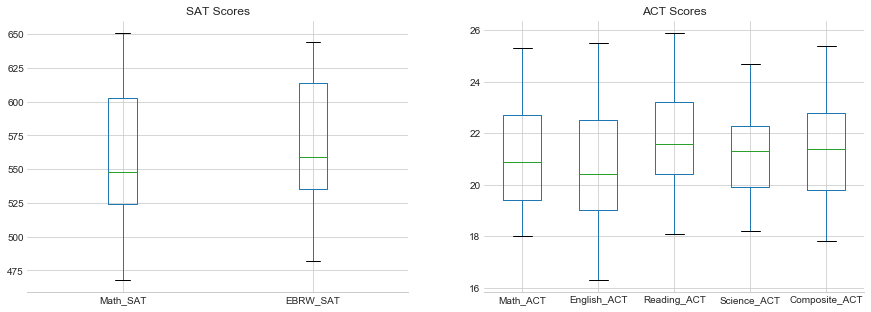

In [30]:
ACT_scores = ["Math_ACT", "English_ACT", "Reading_ACT", "Science_ACT", "Composite_ACT"]
SAT_scores = ["Math_SAT", "EBRW_SAT"]
participation_rates = ["Participation_SAT", "Participation_ACT"]

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 5))
sns.despine(left=True)
plt.subplots_adjust(hspace = .5)

ax=axes[0]
ax.set_title("SAT Scores")
df.boxplot(SAT_scores, ax=ax)

ax=axes[1]
ax.set_title("ACT Scores")
df.boxplot(ACT_scores, ax=ax);

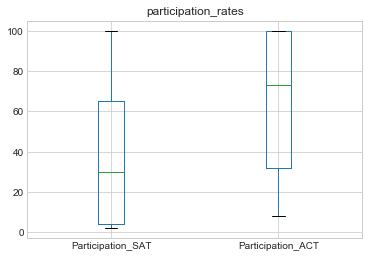

In [31]:
# Compare participation rates
plt.title("participation_rates")
df.boxplot(participation_rates);

##### <span style='color:#35aca4'>H. Create a US heat map for participation rates by state.</span>

In [32]:
# Modified from example code from plotly

import plotly
import plotly.plotly as py
import pandas as pd

plotly.tools.set_credentials_file(username='gbkgwyneth', api_key='NS01qFBPZLMjc5Kb6AEa')

scl = [[0.0, 'rgb(147, 208, 191)'],[0.2, 'rgb(114, 191, 196)'],[0.4, 'rgb(82, 174, 201)'],\
             [0.6, 'rgb(64, 149, 181)'],[0.8, 'rgb(59, 116, 138)'],[1.0, 'rgb(55, 83, 94)']]

# From Stack Overflow
# https://stackoverflow.com/questions/48979352/choropleth-map-in-python-using-plotly-without-state-codes
state_codes = {
    'District of Columbia' : 'DC','Mississippi': 'MS', 'Oklahoma': 'OK', 
    'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 
    'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 
    'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 
    'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 
    'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 
    'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 
    'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI',
    'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 
    'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 
    'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 
    'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 
    'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 
    'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 
    'Nevada': 'NV', 'Maine': 'ME'}

state_df = pd.DataFrame.from_dict(state_codes, orient='index')

state_df.rename(columns={ 0:'Code'}, inplace=True)
df_heat = pd.concat([df,state_df], axis=1)
for col in df_heat.columns:
     df_heat[col] = df_heat[col].astype(str)

def heatmap(df, col, title, scl):
    data = [ dict(
             type='choropleth',
             colorscale = scl,
             autocolorscale = False,
             locations = df['Code'],
             z = df[col].astype(float),
             locationmode = 'USA-states',
             text = df['Code'],
             marker = dict(
                line = dict (
                    color = 'rgb(255,255,255)',
                    width = 2
                ) ),
            colorbar = dict(
                title = "Rate")
            ) ]

    layout = dict(
            title = title,
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showlakes = True,
                lakecolor = 'rgb(255, 255, 255)'),
                 )

    fig = dict( data=data, layout=layout )
    
    return fig

##### <span style='color:#35aca4'>SAT Participation Rate by State</span>

In [46]:
fig_sat = heatmap(df_heat,"Participation_SAT", 'SAT Participation Rate by State', scl)
py.iplot( fig_sat, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~gbkgwyneth/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


##### <span style='color:#35aca4'>ACT Participation Rate by State</span>

In [47]:
fig_act = heatmap(df_heat,"Participation_ACT", 'ACT Participation Rate by State', scl)
py.iplot( fig_act, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~gbkgwyneth/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


##### <span style='color:#35aca4'>SAT Participation Count by State</span>

In [48]:
fig_sat_count = heatmap(df_heat,"Participation_SAT_count", 'SAT Participation Count by State', scl)
py.iplot( fig_sat_count, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~gbkgwyneth/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


##### <span style='color:#35aca4'>ACT Participation Count by State</span>

In [49]:
fig_act_count = heatmap(df_heat,"Participation_ACT_count", 'ACT Participation Count by State', scl)
py.iplot( fig_act_count, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~gbkgwyneth/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


##### <span style='color:#35aca4'>Enrollment by State</span>

In [50]:
fig_enroll = heatmap(df_heat,"Enroll", 'Enrollment by State', scl)
py.iplot( fig_enroll, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~gbkgwyneth/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


<span style='color:#f67088'>**New Hampshire and Vermot did not provide data, so they are colored with black.**</span>

<hr>
 <a name="step4"></a>
## <span style='color:#32b165'>IV. Descriptive and Inferential Statistics</span>

##### <span style='color:#35aca4'>A. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)</span>

In [38]:
# The center, the shape, and the spread.
mu=pd.Series(df.mean(), name="Mean")
std = pd.Series(df.std(), name="Std Dev")
pd.concat([mu,std], axis=1)

,Mean,Std Dev
Participation_SAT,38.244898,34.921657
EBRW_SAT,570.020408,46.279265
Math_SAT,557.755102,47.781853
Total_SAT,1127.857143,93.761222
Participation_ACT,66.959184,31.610230
English_ACT,20.791837,2.284261
Math_ACT,21.063265,1.918625
Reading_ACT,21.883673,1.996178
Science_ACT,21.357143,1.697670
Composite_ACT,21.395918,1.953838


<span style='color:#38a7d0'>The distributions of the scores and participation rates are not normal and not close to uniform. I would like to have more data.</span>

##### <span style='color:#35aca4'>B. Summarize each relationship. Be sure to back up these summaries with statistics.</span>

<span style='color:#38a7d0'>There is an inverse relationship between participation rates of the two tests. Also, average section scores on the tests are related to the average overall scores by state.</span>

##### <span style='color:#35aca4'>C. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.</span>

In [39]:
t_stat, p_value = stats.ttest_ind(df.Participation_ACT,df.Participation_SAT)
print("The t-statistic is {}.".format(t_stat))
print("The p-value is {}.".format(p_value))

The t-statistic is 4.267209377921401.
The p-value is 4.643980268715058e-05.


##### <span style='color:#35aca4'>D. Plot the confidence interval</span>

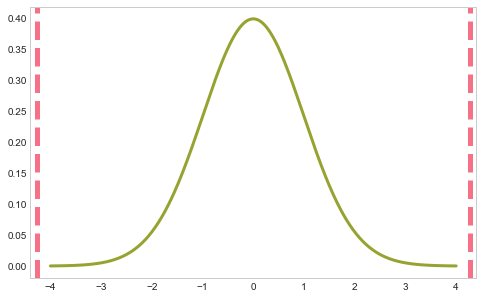

In [40]:
# Plot the confidence interval

# Taken from lecture notebook
# Generate points on the x axis between -4 and 4:
xpoints = np.linspace(-4, 4, 500)

# Use `stats.t.pdf` to get values on the probability density function for the t-distribution.
# The second argument is the degrees of freedom: n1 + n2 - 2.
ypoints = stats.t.pdf(xpoints, 
                      len(df.Participation_ACT)+len(df.Participation_SAT) - 2,
                      0, 1)

# Initialize a `matplotlib` "figure."
fig = plt.figure(figsize=(8,5))

# Get the current "axis" out of the figure.
ax = fig.gca()

# Plot the lines using `matplotlib`'s plot function:
ax.plot(xpoints, ypoints, linewidth=3, color=reg2_color)

# Plot a vertical line for our measured difference in rates' t-statistic.
ax.axvline(t_stat, color=reg_color, linestyle='--', lw=5)
ax.axvline(-t_stat, color=reg_color, linestyle='--', lw=5);

<span style='color:#38a7d0'>Since the <span style="font-family:monospace">p_vale</span> is small, we can reject the null hypothesis here. There is a correlation between the participation rates in the ACT and the SAT. In states where ACT participation is high, SAT participation is low.</span>

##### <span style='color:#35aca4'>E. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.</span>

In [41]:
n = df.shape[0]
participation_act_mean = df['Participation_ACT'].mean()
participation_act_std_error = df['Participation_ACT'].std()/np.sqrt(n)

interval_act = stats.norm.interval(0.95, participation_act_mean, participation_act_std_error)
print("The 95% confidence interval for the participation of the ACT is [{},{}].".format(interval_act[0],interval_act[1]))

The 95% confidence interval for the participation of the ACT is [58.10848194560994,75.80988540132883].


In [42]:
participation_sat_mean = df['Participation_SAT'].mean()
participation_sat_std_error = df['Participation_SAT'].std()/np.sqrt(n)

interval_sat = stats.norm.interval(0.95, participation_sat_mean, participation_sat_std_error)
print("The 95% confidence interval for the participation rate of the SAT is [{},{}].".format(interval_sat[0],interval_sat[1]))

The 95% confidence interval for the participation rate of the SAT is [28.46701374869913,48.02278216966822].


<span style='color:#38a7d0'>This is not good data to use since the populations of the states vary so greatly. Without including the enrollment data in the analysis, the test here lacks much meaning.</span>

##### <span style='color:#35aca4'>F. Given your answer to 26, was your answer to 27 surprising? Why?</span>

<span style='color:#38a7d0'>I'm not sure what the confidence intervals for the state participation rates for the SAT and ACT reflect, beacuse the data is not normalized by population sizes.</span>

##### <span style='color:#35aca4'>G. Is it appropriate to generate correlation between SAT and ACT math scores? Why?</span>

In [43]:
np.correlate(df.Participation_ACT, df.Participation_SAT)

array([ 81309.])

<span style='color:#38a7d0'>Did you say correlations? Let's make a heat map!</span>

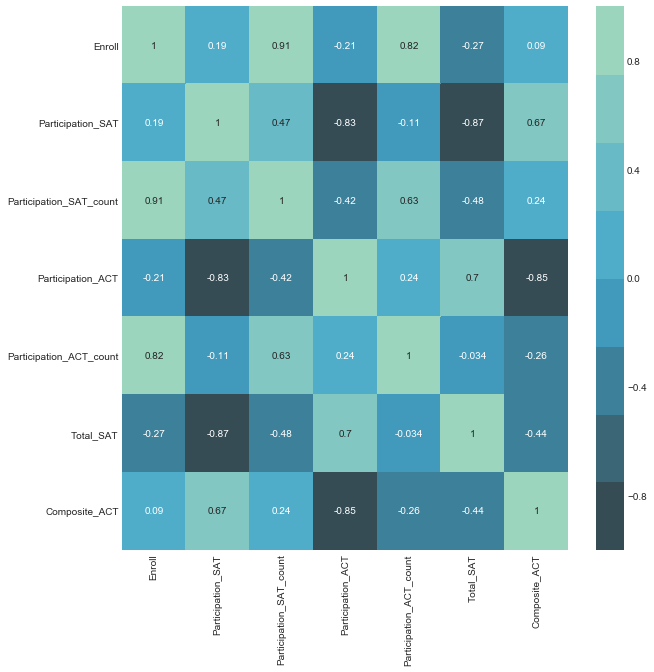

In [44]:
# Heat map of colmns 
cols = ['Enroll','Participation_SAT','Participation_SAT_count','Participation_ACT','Participation_ACT_count','Total_SAT','Composite_ACT',]
colors = sns.color_palette("GnBu_d", 8)
plt.figure(figsize=(10,10))
sns.set_palette(colors)
# sns.heatmap(df_train[top_corr].corr(),vmin=-1,vmax=1, cmap = colors);
sns.heatmap(df[cols].corr(),vmin=-1,vmax=1, cmap = colors, annot=True);


<span style='color:#38a7d0'>Maybe for states that have similar participation rates for both tests it would be appropriate to generate the correlation. But since states with high rates of participation have lower scores in general, it is probably not appropriate to compare in states where the participation rates are very different.</span>

##### <span style='color:#35aca4'>H. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?</span>

<span style='color:#38a7d0'>The samples are not random, so I think that statistical inference is not appropriate.</span>

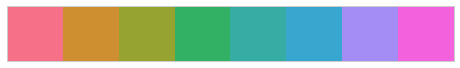

In [45]:
# Setting up colors for the notebook
sns.palplot(sns.color_palette("husl", 8))
colors = ['#f67088', '#ce8f31', '#96a331', '#32b165', '#35aca4', '#38a7d0', '#a38cf4', '#f461dd']